In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read in 3 datasets for Pfizer, Moderna, and Janssen
realTimeData=True # If true it will take real time data, otherwise it will take the local csv file

if realTimeData:
    # Download data and rename column
    Pfizer = pd.read_csv("https://data.cdc.gov/resource/saz5-9hgg.csv?$limit=2000").rename(columns={"jurisdiction": "Jurisdiction", "week_of_allocations": "Week of Allocations", "_1st_dose_allocations": "1st Dose Allocations", "_2nd_dose_allocations": "2nd Dose Allocations"})
    Moderna = pd.read_csv("https://data.cdc.gov/resource/b7pe-5nws.csv?$limit=2000").rename(columns={"jurisdiction": "Jurisdiction", "week_of_allocations": "Week of Allocations", "_1st_dose_allocations": "1st Dose Allocations", "_2nd_dose_allocations": "2nd Dose Allocations"})
    Janssen = pd.read_csv("https://data.cdc.gov/resource/w9zu-fywh.csv?$limit=2000").rename(columns={"jurisdiction": "Jurisdiction", "week_of_allocations": "Week of Allocations", "_1st_dose_allocations": "1st Dose Allocations"})
else:
    # Load from our preprocessed data
    Pfizer = pd.read_csv("COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Pfizer.csv")
    Moderna = pd.read_csv("COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Moderna.csv")
    Janssen = pd.read_csv("COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Janssen.csv")

In [3]:
Pfizer

,Jurisdiction,Week of Allocations,1st Dose Allocations,2nd Dose Allocations
0,Connecticut,2021-05-03T00:00:00.000,54990,54990
1,Maine,2021-05-03T00:00:00.000,21060,21060
2,Massachusetts,2021-05-03T00:00:00.000,105300,105300
3,New Hampshire,2021-05-03T00:00:00.000,21060,21060
4,Rhode Island,2021-05-03T00:00:00.000,16380,16380
...,...,...,...,...
1318,Virginia,2020-12-14T00:00:00.000,72150,72150
1319,Washington,2020-12-14T00:00:00.000,62400,62400
1320,West Virginia,2020-12-14T00:00:00.000,16575,16575
1321,Wisconsin,2020-12-14T00:00:00.000,49725,49725


In [4]:
Moderna

,Jurisdiction,Week of Allocations,1st Dose Allocations,2nd Dose Allocations
0,Connecticut,2021-05-03T00:00:00.000,40400,40400
1,Maine,2021-05-03T00:00:00.000,15400,15400
2,Massachusetts,2021-05-03T00:00:00.000,77700,77700
3,New Hampshire,2021-05-03T00:00:00.000,15500,15500
4,Rhode Island,2021-05-03T00:00:00.000,12100,12100
...,...,...,...,...
1255,Virginia,2020-12-21T00:00:00.000,146400,146400
1256,Washington,2020-12-21T00:00:00.000,128000,128000
1257,West Virginia,2020-12-21T00:00:00.000,32600,32600
1258,Wisconsin,2020-12-21T00:00:00.000,101000,101000


In [5]:
Janssen

,Jurisdiction,Week of Allocations,1st Dose Allocations
0,Connecticut,2021-05-03T00:00:00.000,8300
1,Maine,2021-05-03T00:00:00.000,3200
2,Massachusetts,2021-05-03T00:00:00.000,16000
3,New Hampshire,2021-05-03T00:00:00.000,3200
4,Rhode Island,2021-05-03T00:00:00.000,2500
...,...,...,...
436,Alaska,2021-03-01T00:00:00.000,8900
437,Idaho,2021-03-01T00:00:00.000,13300
438,Oregon,2021-03-01T00:00:00.000,34400
439,Washington,2021-03-01T00:00:00.000,60900


In [6]:
# merge the three datasets and rename columns for readability
merged = Pfizer.merge(Moderna, how='outer', on=['Jurisdiction','Week of Allocations'])
merged = merged.merge(Janssen, how='outer', on=['Jurisdiction','Week of Allocations'])

columns = ['Jurisdiction','Week','Pfizer 1st Dose','Pfizer 2nd Dose','Moderna 1st Dose','Moderna 2nd Dose','Janssen Dose']
merged.columns = columns
merged

,Jurisdiction,Week,Pfizer 1st Dose,Pfizer 2nd Dose,Moderna 1st Dose,Moderna 2nd Dose,Janssen Dose
0,Connecticut,2021-05-03T00:00:00.000,54990,54990,40400.0,40400.0,8300.0
1,Maine,2021-05-03T00:00:00.000,21060,21060,15400.0,15400.0,3200.0
2,Massachusetts,2021-05-03T00:00:00.000,105300,105300,77700.0,77700.0,16000.0
3,New Hampshire,2021-05-03T00:00:00.000,21060,21060,15500.0,15500.0,3200.0
4,Rhode Island,2021-05-03T00:00:00.000,16380,16380,12100.0,12100.0,2500.0
...,...,...,...,...,...,...,...
1318,Virginia,2020-12-14T00:00:00.000,72150,72150,NaN,NaN,NaN
1319,Washington,2020-12-14T00:00:00.000,62400,62400,NaN,NaN,NaN
1320,West Virginia,2020-12-14T00:00:00.000,16575,16575,NaN,NaN,NaN
1321,Wisconsin,2020-12-14T00:00:00.000,49725,49725,NaN,NaN,NaN


In [7]:
# replace NaN values to 0 for now to represent no doses for that period
merged = merged.fillna(0)

# change week column to something more sort friendly
merged['Week'] = pd.to_datetime(merged.Week)
merged

,Jurisdiction,Week,Pfizer 1st Dose,Pfizer 2nd Dose,Moderna 1st Dose,Moderna 2nd Dose,Janssen Dose
0,Connecticut,2021-05-03,54990,54990,40400.0,40400.0,8300.0
1,Maine,2021-05-03,21060,21060,15400.0,15400.0,3200.0
2,Massachusetts,2021-05-03,105300,105300,77700.0,77700.0,16000.0
3,New Hampshire,2021-05-03,21060,21060,15500.0,15500.0,3200.0
4,Rhode Island,2021-05-03,16380,16380,12100.0,12100.0,2500.0
...,...,...,...,...,...,...,...
1318,Virginia,2020-12-14,72150,72150,0.0,0.0,0.0
1319,Washington,2020-12-14,62400,62400,0.0,0.0,0.0
1320,West Virginia,2020-12-14,16575,16575,0.0,0.0,0.0
1321,Wisconsin,2020-12-14,49725,49725,0.0,0.0,0.0


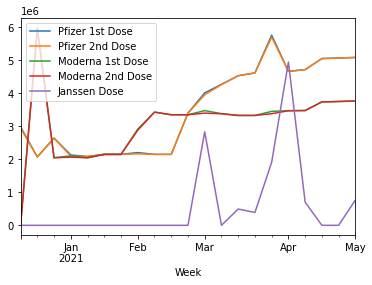

In [8]:
# quick and simple EDA to look at number of doses over times
merged.groupby('Week').sum().plot();

In [9]:
# Total dose over time by brand (Doesn't matter if it's first or second)
totalDose = merged.copy()
totalDose['Pfizer'] = totalDose['Pfizer 1st Dose'] + totalDose['Pfizer 2nd Dose']
totalDose['Moderna'] = totalDose['Moderna 1st Dose'] + totalDose['Moderna 2nd Dose']
totalDose['Janssen'] = totalDose['Janssen Dose']
totalDose=totalDose.drop(['Pfizer 1st Dose', 'Pfizer 2nd Dose', 'Moderna 1st Dose', 'Moderna 2nd Dose', 'Janssen Dose'], axis=1)
totalDose

,Jurisdiction,Week,Pfizer,Moderna,Janssen
0,Connecticut,2021-05-03,109980,80800.0,8300.0
1,Maine,2021-05-03,42120,30800.0,3200.0
2,Massachusetts,2021-05-03,210600,155400.0,16000.0
3,New Hampshire,2021-05-03,42120,31000.0,3200.0
4,Rhode Island,2021-05-03,32760,24200.0,2500.0
...,...,...,...,...,...
1318,Virginia,2020-12-14,144300,0.0,0.0
1319,Washington,2020-12-14,124800,0.0,0.0
1320,West Virginia,2020-12-14,33150,0.0,0.0
1321,Wisconsin,2020-12-14,99450,0.0,0.0


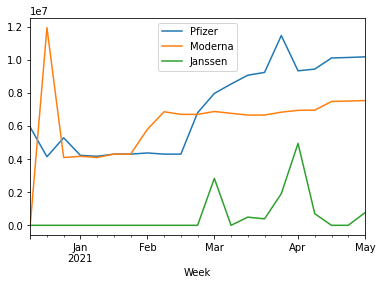

In [10]:
# quick and simple EDA to look at Total dose over time by brand
totalDose.groupby('Week').sum().plot();

            Pfizer 1st Dose  Pfizer 2nd Dose  Moderna 1st Dose  \
Week                                                             
2020-12-14            85800            85800               0.0   
2020-12-21            60450            60450          174600.0   
2020-12-28            78000            78000           60300.0   
2021-01-04            60450            60450           60100.0   
2021-01-11            60450            60450           60300.0   
2021-01-18            63375            63375           63300.0   
2021-01-25            63375            63375           63300.0   
2021-02-01            62400            62400           83600.0   
2021-02-08            63375            63375           91300.0   
2021-02-15            63375            63375           98700.0   
2021-02-22            99450            99450           98700.0   
2021-03-01           114660           114660           98700.0   
2021-03-08           125190           125190           98700.0   
2021-03-15

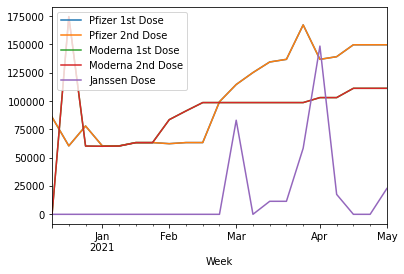

In [11]:
# Illinois's vaccine distribution data over time
illinois = merged.copy()
illinois = illinois[illinois['Jurisdiction'] == "Illinois"]
illinois.groupby('Week').sum().plot();
print(illinois.groupby('Week').sum())

Index(['California', 'Texas', 'Florida', 'Federal Entities', 'Ohio'], dtype='object', name='Jurisdiction')
Jurisdiction  California  Federal Entities    Florida      Ohio      Texas
Week                                                                      
2020-12-14      655200.0          298350.0   358800.0  196950.0   448500.0
2020-12-21     1811250.0          792150.0   991250.0  544200.0  1240800.0
2020-12-28     1059350.0          457400.0   579850.0  318800.0   725750.0
2021-01-04      926900.0          426400.0   506700.0  279400.0   634850.0
2021-01-11      930650.0          404550.0   509650.0  279800.0   638000.0
2021-01-18      971600.0          420600.0   532200.0  292650.0   665700.0
2021-01-25      971600.0          421200.0   532200.0  292650.0   665700.0
2021-02-01     1125650.0          527230.0   615450.0  337500.0   770550.0
2021-02-08     1187400.0         1173400.0   650200.0  357450.0   813500.0
2021-02-15     1244200.0          537600.0   681200.0  374450.0   85

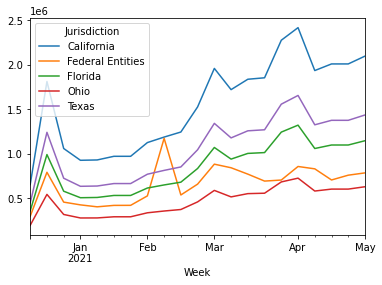

In [12]:
# Create a list to get total by week
percentageByWeek = merged.copy()
percentageByWeek = percentageByWeek.groupby('Week').sum()
percentageByWeek = percentageByWeek.rename(columns={"Pfizer 1st Dose": "Pfizer 1st Dose Total", 
                                 "Pfizer 2nd Dose": "Pfizer 2nd Dose Total", 
                                 "Moderna 1st Dose": "Moderna 1st Dose Total", 
                                 "Moderna 2nd Dose": "Moderna 2nd Dose Total", 
                                 "Janssen Dose": "Janssen Dose Total"})

# Join data with the original data, so we get calculate the percentage for each column
percentage = merged.copy()
percentage = percentage.join(percentageByWeek, on='Week')
percentage["Pfizer 1st Dose %"] = percentage["Pfizer 1st Dose"] / percentage["Pfizer 1st Dose Total"] * 100
percentage["Pfizer 2nd Dose %"] = percentage["Pfizer 2nd Dose"] / percentage["Pfizer 2nd Dose Total"] * 100
percentage["Moderna 1st Dose %"] = percentage["Moderna 1st Dose"] / percentage["Moderna 1st Dose Total"] * 100
percentage["Moderna 2nd Dose %"] = percentage["Moderna 2nd Dose"] / percentage["Moderna 2nd Dose Total"] * 100
percentage["Janssen Dose %"] = percentage["Janssen Dose"] / percentage["Janssen Dose Total"] * 100
percentage = percentage[["Jurisdiction","Week",
                         "Pfizer 1st Dose %", "Pfizer 2nd Dose %",
                         "Moderna 1st Dose %", "Moderna 2nd Dose %",
                         "Janssen Dose %"]].fillna(0)
#print(percentage.groupby('Jurisdiction').sum().sort_values(by=['Pfizer 1st Dose %', 'Pfizer 2nd Dose %'], ascending=False).head(5).index)
top5 = percentage.groupby('Jurisdiction').sum().sort_values(by=['Pfizer 1st Dose %', 'Pfizer 2nd Dose %'], ascending=False).head(5).index

print(top5)
top5Result = merged.copy()
top5Result = top5Result[top5Result['Jurisdiction'].isin(top5)]

top5Result["Total"] = (top5Result["Pfizer 1st Dose"] + top5Result["Pfizer 2nd Dose"] + top5Result["Moderna 1st Dose"] + top5Result["Moderna 2nd Dose"] + top5Result["Janssen Dose"])
top5Result = top5Result[["Jurisdiction", "Week", "Total"]]
top5Result = top5Result.pivot(index="Week", columns='Jurisdiction')["Total"] # Flip to match plot format
top5Result.plot()
print(top5Result)

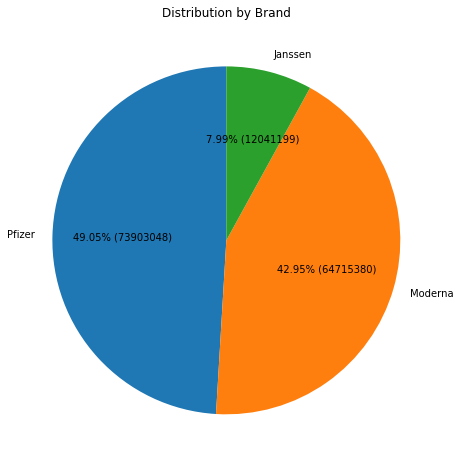

In [13]:
data = merged.copy()
pfizerCount=data["Pfizer 1st Dose"].sum()
modernaCount=data["Moderna 1st Dose"].sum()
janssenCount=data["Janssen Dose"].sum()

plt.figure(figsize=(8,8))
plt.title("Distribution by Brand")
counts = [pfizerCount, modernaCount, janssenCount]
labels = ["Pfizer", "Moderna", "Janssen"]
plt.pie(counts, labels=labels, autopct=lambda p:f'{p:.2f}% ({p*sum(counts)/100 :.0f})', startangle=90)
plt.show()

In [14]:
from fbprophet import Prophet

# Convert Illinois's vaccine distribution data over time
illinoisPredict = merged.copy()
illinoisPredict = illinoisPredict[illinoisPredict['Jurisdiction'] == "Illinois"]
illinoisPredict = illinoisPredict[["Week", "Pfizer 2nd Dose", "Moderna 2nd Dose", "Janssen Dose"]]

illinoisPredict = illinoisPredict.groupby('Week').sum().sum(axis=1).reset_index(name ='y').rename(columns={"Week":"ds"})
print(illinoisPredict.head(15))
# Begin model
model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
model.fit(illinoisPredict.head(15));

           ds         y
0  2020-12-14   85800.0
1  2020-12-21  235050.0
2  2020-12-28  138300.0
3  2021-01-04  120550.0
4  2021-01-11  120750.0
5  2021-01-18  126675.0
6  2021-01-25  126675.0
7  2021-02-01  146000.0
8  2021-02-08  154675.0
9  2021-02-15  162075.0
10 2021-02-22  198150.0
11 2021-03-01  296460.0
12 2021-03-08  223890.0
13 2021-03-15  244750.0
14 2021-03-22  247090.0


INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


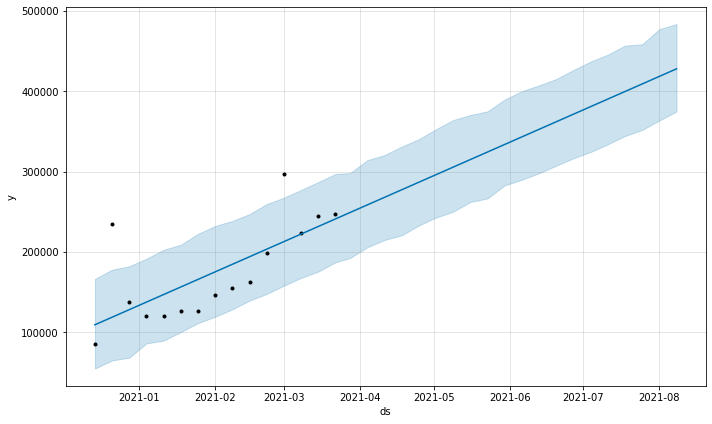

In [15]:
pd.plotting.register_matplotlib_converters()
future = model.make_future_dataframe(20, freq='W', include_history=True)
forecast = model.predict(future)
model.plot(forecast);

           ds          trend     yhat_lower     yhat_upper    trend_lower  \
0  2020-12-14  109353.357853   54837.427521  166386.239263  109353.357853   
1  2020-12-21  118764.340783   64954.390922  177979.697909  118764.340783   
2  2020-12-28  128175.323715   68381.923130  182217.781890  128175.323715   
3  2021-01-04  137586.306656   86127.912559  191661.828942  137586.306656   
4  2021-01-11  146997.289599   89658.962507  202686.847515  146997.289599   
5  2021-01-18  156408.272549  100291.417994  209039.186978  156408.272549   
6  2021-01-25  165819.255496  111374.536914  222500.123530  165819.255496   
7  2021-02-01  175230.238450  119354.701314  232384.900864  175230.238450   
8  2021-02-08  184641.221411  128528.850303  238622.214213  184641.221411   
9  2021-02-15  194052.204377  139485.577237  247118.118839  194052.204377   
10 2021-02-22  203463.187342  147680.783003  259647.084803  203463.187342   
11 2021-03-01  212874.170306  158012.980692  267575.715424  212874.170306   

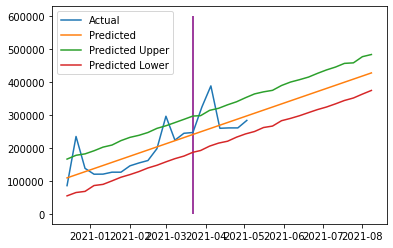

In [16]:
print(forecast)
plt.plot(illinoisPredict.set_index("ds"), label='Actual')
plt.plot(forecast.set_index("ds")["trend"], label='Predicted')
plt.plot(forecast.set_index("ds")["yhat_upper"], label='Predicted Upper')
plt.plot(forecast.set_index("ds")["yhat_lower"], label='Predicted Lower')
plt.vlines(pd.to_datetime("2021-03-22"), 0, 600000, color="purple")
plt.legend()
plt.show()


INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


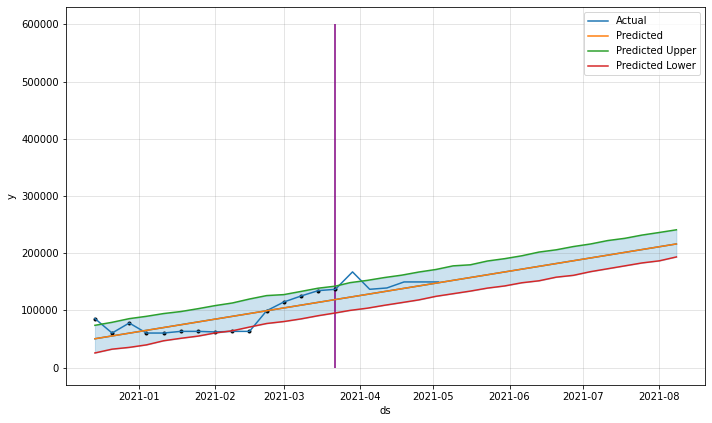

In [20]:
from fbprophet import Prophet
## Pfizer
# Convert Illinois's vaccine distribution data over time
illinoisPredict = merged.copy()
illinoisPredict = illinoisPredict[illinoisPredict['Jurisdiction'] == "Illinois"]
illinoisPredict = illinoisPredict[["Week", "Pfizer 2nd Dose"]]

illinoisPredict = illinoisPredict.groupby('Week').sum().sum(axis=1).reset_index(name ='y').rename(columns={"Week":"ds"})
#print(illinoisPredict.head(15))
# Begin model
model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
model.fit(illinoisPredict.head(15));

pd.plotting.register_matplotlib_converters()
future = model.make_future_dataframe(20, freq='W', include_history=True)
forecast = model.predict(future)
model.plot(forecast);

#print(forecast)
plt.plot(illinoisPredict.set_index("ds"), label='Actual')
plt.plot(forecast.set_index("ds")["trend"], label='Predicted')
plt.plot(forecast.set_index("ds")["yhat_upper"], label='Predicted Upper')
plt.plot(forecast.set_index("ds")["yhat_lower"], label='Predicted Lower')
plt.vlines(pd.to_datetime("2021-03-22"), 0, 600000, color="purple")
plt.legend()
plt.show()


INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


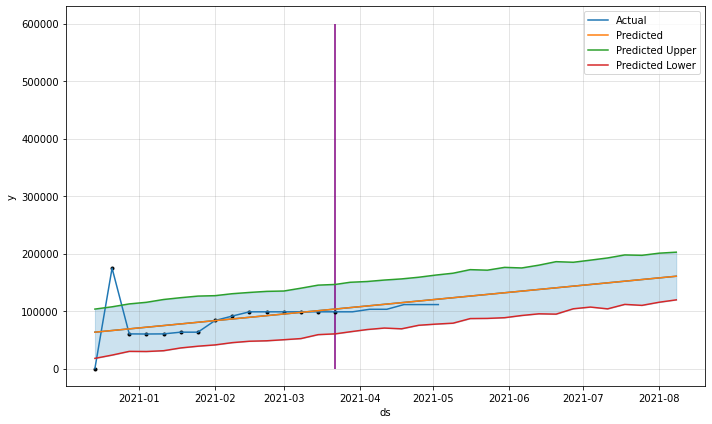

In [18]:
from fbprophet import Prophet
## Moderna
# Convert Illinois's vaccine distribution data over time
illinoisPredict = merged.copy()
illinoisPredict = illinoisPredict[illinoisPredict['Jurisdiction'] == "Illinois"]
illinoisPredict = illinoisPredict[["Week", "Moderna 2nd Dose"]]

illinoisPredict = illinoisPredict.groupby('Week').sum().sum(axis=1).reset_index(name ='y').rename(columns={"Week":"ds"})
#print(illinoisPredict.head(15))
# Begin model
model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
model.fit(illinoisPredict.head(15));

pd.plotting.register_matplotlib_converters()
future = model.make_future_dataframe(20, freq='W', include_history=True)
forecast = model.predict(future)
model.plot(forecast);

#print(forecast)
plt.plot(illinoisPredict.set_index("ds"), label='Actual')
plt.plot(forecast.set_index("ds")["trend"], label='Predicted')
plt.plot(forecast.set_index("ds")["yhat_upper"], label='Predicted Upper')
plt.plot(forecast.set_index("ds")["yhat_lower"], label='Predicted Lower')
plt.vlines(pd.to_datetime("2021-03-22"), 0, 600000, color="purple")
plt.legend()
plt.show()


INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


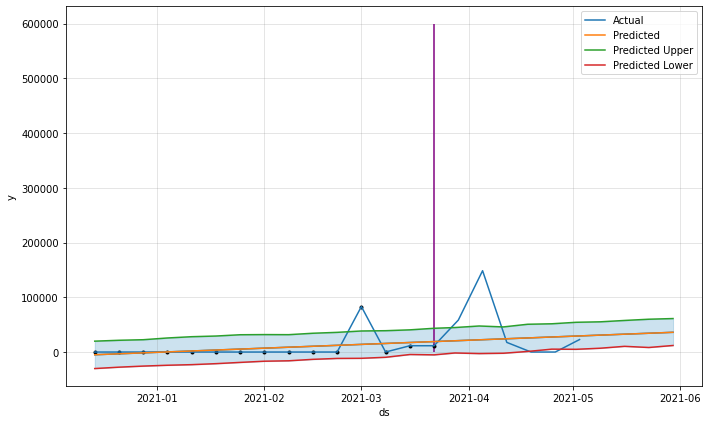

In [19]:
from fbprophet import Prophet
## Janssen
# Convert Illinois's vaccine distribution data over time
illinoisPredict = merged.copy()
illinoisPredict = illinoisPredict[illinoisPredict['Jurisdiction'] == "Illinois"]
illinoisPredict = illinoisPredict[["Week", "Janssen Dose"]]

illinoisPredict = illinoisPredict.groupby('Week').sum().sum(axis=1).reset_index(name ='y').rename(columns={"Week":"ds"})
#print(illinoisPredict.head(15))
# Begin model
model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
model.fit(illinoisPredict.head(15));

pd.plotting.register_matplotlib_converters()
future = model.make_future_dataframe(20, freq='W', include_history=True)
forecast = model.predict(future)
model.plot(forecast);

#print(forecast)
plt.plot(illinoisPredict.set_index("ds"), label='Actual')
plt.plot(forecast.set_index("ds")["trend"], label='Predicted')
plt.plot(forecast.set_index("ds")["yhat_upper"], label='Predicted Upper')
plt.plot(forecast.set_index("ds")["yhat_lower"], label='Predicted Lower')
plt.vlines(pd.to_datetime("2021-03-22"), 0, 600000, color="purple")
plt.legend()
plt.show()
